In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../edited_debt.csv')

y = df['Y'].apply(lambda x: 0 if x=='leave' else 1)

df.drop(['Y'], axis=1, inplace=True)

---

In [3]:
from scipy.linalg import toeplitz
s = np.array(df['KBR'])
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))

In [4]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((220, 3, 1), (220,))

In [5]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3, 1)))
model.add(Dense(1, activation="linear")) # 0-1 사이의 값이 나오는 문제가 아님
model.compile(loss='mse', optimizer='sgd')

Using TensorFlow backend.


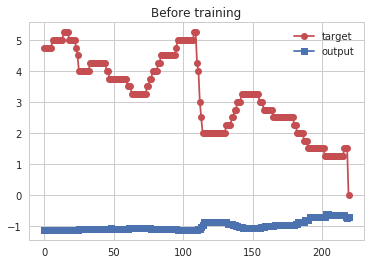

In [6]:
%matplotlib inline
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.legend()
plt.title("Before training")
plt.show()

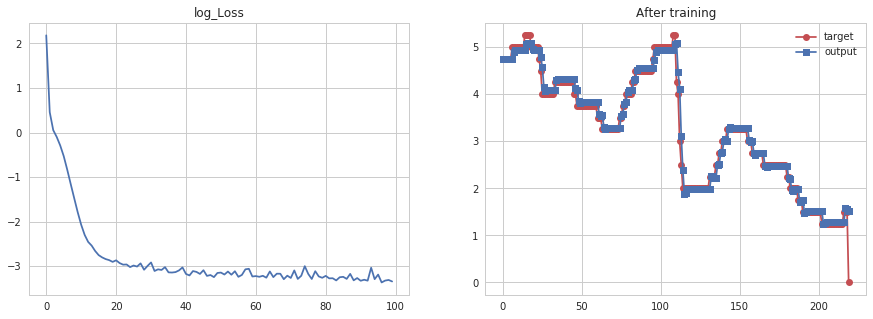

In [7]:
history = model.fit(X_train, Y_train, epochs=100, verbose=0)
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.log(history.history["loss"])) # 
plt.title("log_Loss")
plt.subplot(122)
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label="output")
plt.legend()
plt.title("After training")
plt.show()

### 이렇게 잘한다고?

In [14]:
from keras.layers import TimeDistributed

model2 = Sequential()
model2.add(SimpleRNN(10, return_sequences=True, input_shape=(12, 1))) 
model2.add(TimeDistributed(Dense(1, activation="linear")))
model2.compile(loss='mse', optimizer='sgd')

In [15]:
X_train2 = S[:-2, 0:12][:, :, np.newaxis]
Y_train2 = S[:-2, 12:24][:, :, np.newaxis]
X_train2.shape, Y_train2.shape

((219, 12, 1), (219, 12, 1))

In [16]:
%%time
history2 = model2.fit(X_train2, Y_train2, epochs=1000, verbose=0)

CPU times: user 1min, sys: 6.87 s, total: 1min 6s
Wall time: 30.3 s


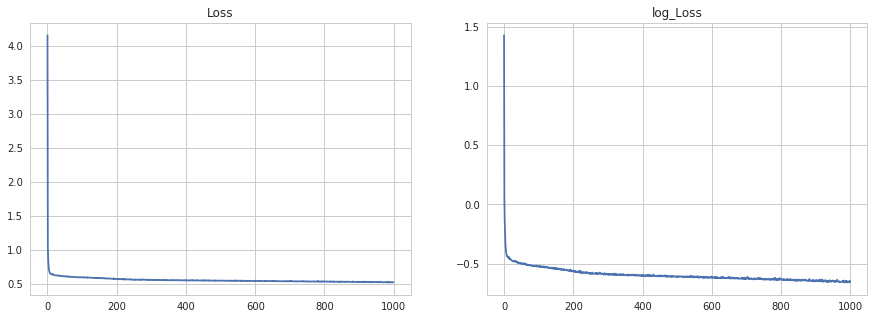

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history2.history["loss"])
plt.title("Loss")
plt.subplot(122)
plt.plot(np.log(history2.history["loss"]))
plt.title("log_Loss")
plt.show()

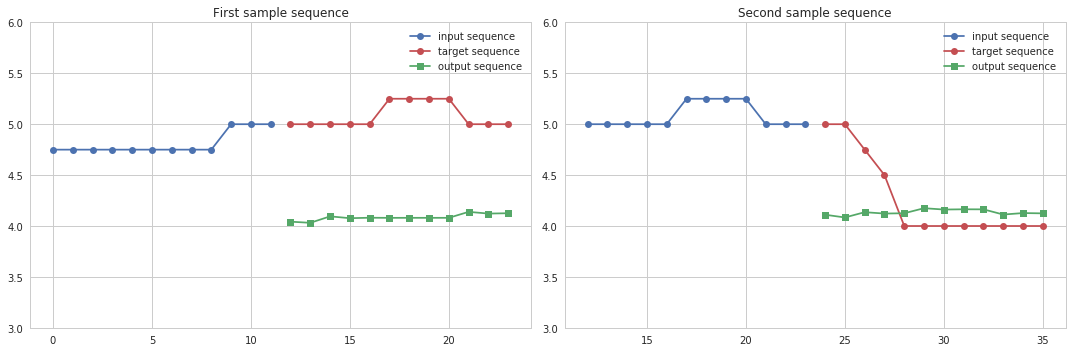

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.arange(0, 12), X_train2[0].flatten(), 'bo-', label="input sequence")
plt.plot(np.arange(12, 24), Y_train2[0].flatten(), 'ro-', label="target sequence")
plt.plot(np.arange(12, 24), model2.predict(X_train2[0:1]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.ylim(3.0, 6.0)
plt.title("First sample sequence")
plt.subplot(122)
plt.plot(np.arange(12, 24), X_train2[12].flatten(), 'bo-', label="input sequence")
plt.plot(np.arange(24, 36), Y_train2[12].flatten(), 'ro-', label="target sequence")
plt.plot(np.arange(24, 36), model2.predict(X_train2[12:13]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.ylim(3.0, 6.0)
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

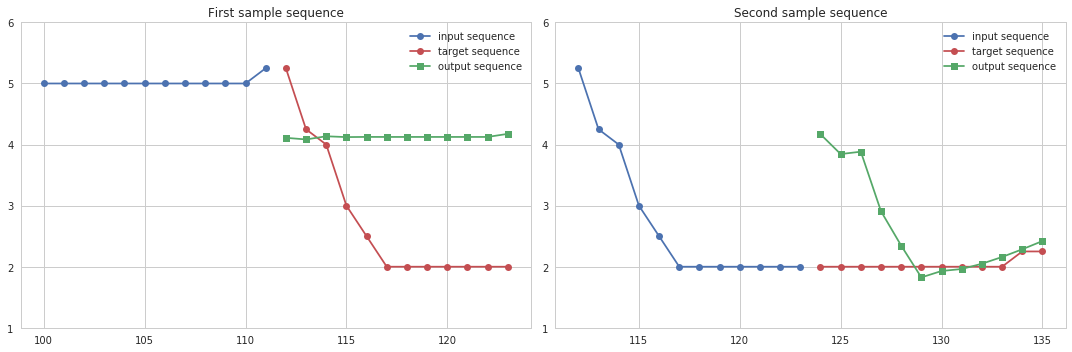

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.arange(100, 112), X_train2[100].flatten(), 'bo-', label="input sequence")
plt.plot(np.arange(112, 124), Y_train2[100].flatten(), 'ro-', label="target sequence")
plt.plot(np.arange(112, 124), model2.predict(X_train2[100:101]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.ylim(1.0, 6.0)
plt.title("First sample sequence")
plt.subplot(122)
plt.plot(np.arange(112, 124), X_train2[112].flatten(), 'bo-', label="input sequence")
plt.plot(np.arange(124, 136), Y_train2[112].flatten(), 'ro-', label="target sequence")
plt.plot(np.arange(124, 136), model2.predict(X_train2[112:113]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.ylim(1, 6)
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

---

4 분기 앞 부터 예측

## what to do?

In [20]:
from keras.layers import TimeDistributed

model2 = Sequential()
model2.add(SimpleRNN(20, return_sequences=True, input_shape=(4, 1))) 
model2.add(TimeDistributed(Dense(1, activation="linear"))) # 3차원 텐서 입력
model2.compile(loss='mse', optimizer='sgd')

In [21]:
X_train2 = S[:-2, 0:4][:, :, np.newaxis]
Y_train2 = S[:-2, 4:8][:, :, np.newaxis]
X_train2.shape, Y_train2.shape

((219, 4, 1), (219, 4, 1))

In [22]:
%%time
history2 = model2.fit(X_train2, Y_train2, epochs=10000, verbose=0)

CPU times: user 6min 22s, sys: 37.6 s, total: 7min
Wall time: 3min 9s


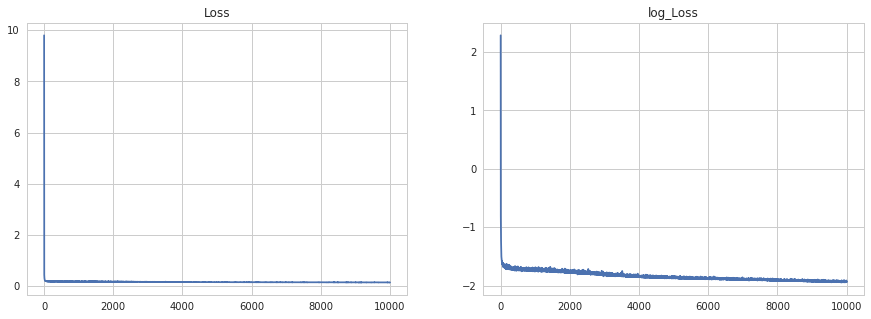

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history2.history["loss"])
plt.title("Loss")
plt.subplot(122)
plt.plot(np.log(history2.history["loss"]))
plt.title("log_Loss")
plt.show()

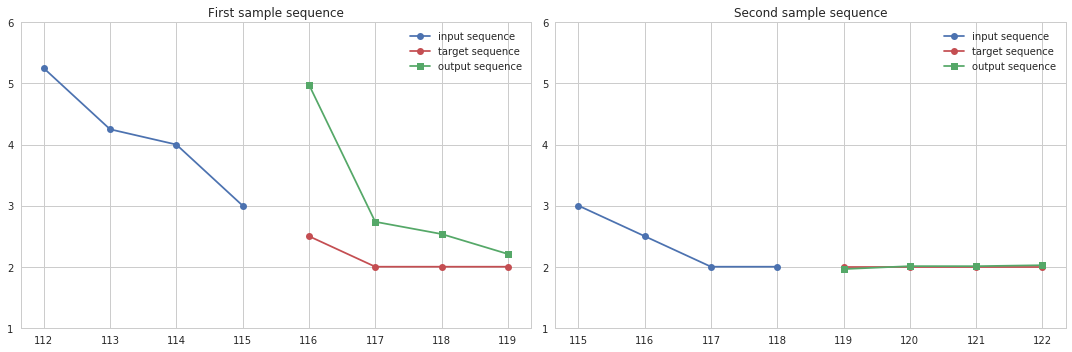

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.arange(112, 116), X_train2[112].flatten(), 'bo-', label="input sequence")
plt.plot(np.arange(116, 120), Y_train2[112].flatten(), 'ro-', label="target sequence")
plt.plot(np.arange(116, 120), model2.predict(X_train2[112:113]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.ylim(1.0, 6.0)
plt.title("First sample sequence")
plt.subplot(122)
plt.plot(np.arange(115, 119), X_train2[115].flatten(), 'bo-', label="input sequence")
plt.plot(np.arange(119, 123), Y_train2[115].flatten(), 'ro-', label="target sequence")
plt.plot(np.arange(119, 123), model2.predict(X_train2[119:120]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.ylim(1.0, 6.0)
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

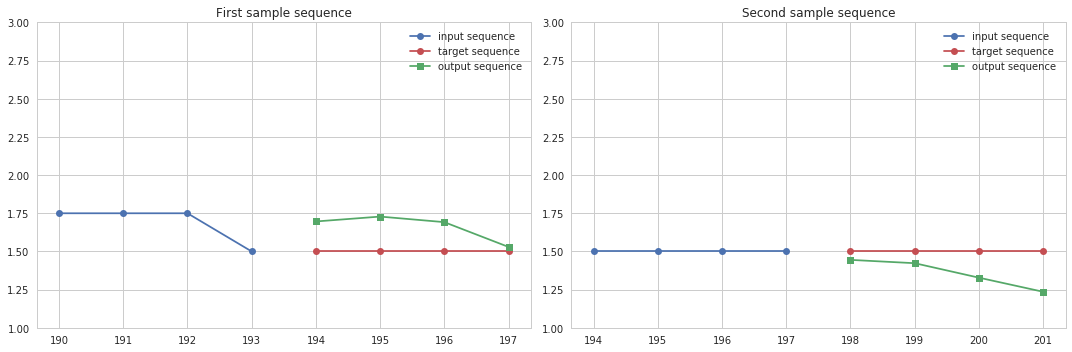

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.arange(190, 194), X_train2[190].flatten(), 'bo-', label="input sequence")
plt.plot(np.arange(194, 198), Y_train2[190].flatten(), 'ro-', label="target sequence")
plt.plot(np.arange(194, 198), model2.predict(X_train2[190:191]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.ylim(1.0, 3.0)
plt.title("First sample sequence")
plt.subplot(122)
plt.plot(np.arange(194, 198), X_train2[194].flatten(), 'bo-', label="input sequence")
plt.plot(np.arange(198, 202), Y_train2[194].flatten(), 'ro-', label="target sequence")
plt.plot(np.arange(198, 202), model2.predict(X_train2[194:195]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.ylim(1.0, 3.0)
plt.title("Second sample sequence")
plt.tight_layout()
plt.show()

In [35]:
X_train2[218:219].flatten()

array([1.25, 1.5 , 1.5 , 1.5 ])

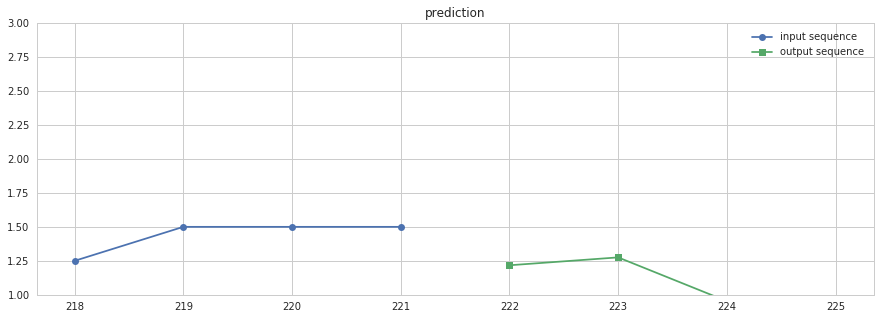

In [38]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(218, 222), X_train2[218].flatten(), 'bo-', label="input sequence")
plt.plot(np.arange(222, 226), model2.predict(X_train2[218:219]).flatten(), 'gs-', label="output sequence")
plt.legend()
plt.ylim(1.0, 3.0)
plt.title("prediction")
plt.show()

---

In [39]:
from fbprophet import Prophet
df['y'] = df['KBR']
df=df[['date', 'y']]
df.rename({'date':'ds', 'y':'y'}, axis=1, inplace=True)
df.head()

,ds,y
0,1999-05,4.75
1,1999-06,4.75
2,1999-07,4.75
3,1999-08,4.75
4,1999-09,4.75


In [40]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
582,2019-01-28
583,2019-01-29
584,2019-01-30
585,2019-01-31
586,2019-02-01


In [41]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
582,2019-01-28,1.535465,0.709097,2.393005
583,2019-01-29,1.440679,0.573793,2.312630
584,2019-01-30,1.330676,0.460547,2.186855
585,2019-01-31,1.207133,0.324975,2.089804
586,2019-02-01,1.072096,0.218389,1.869980


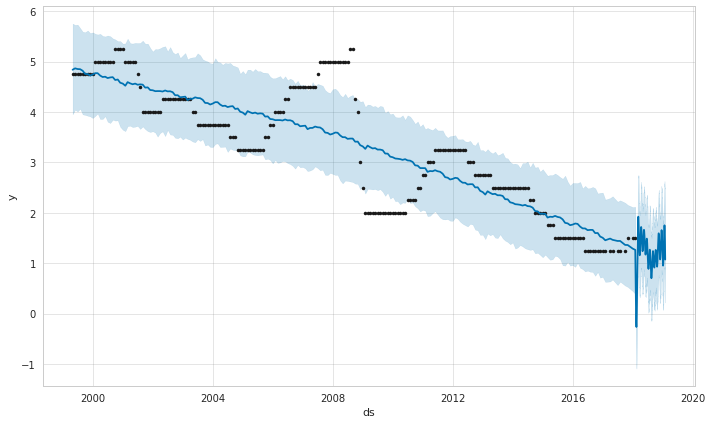

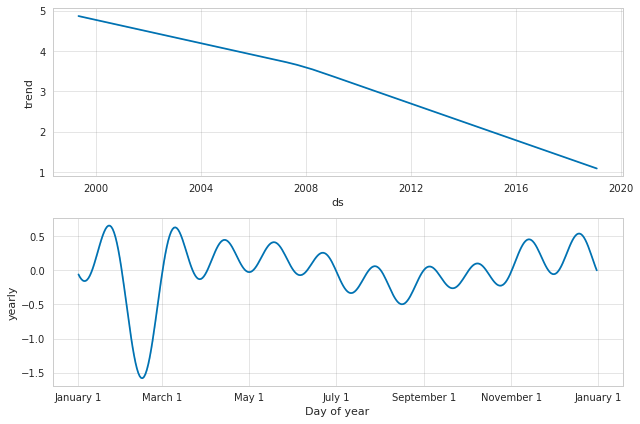

In [42]:
m.plot(forecast);
m.plot_components(forecast);